# Import Modules

In [21]:
import os, sys
import pandas as pd
import numpy as np
import datetime as dt
from pprint import pprint
import csv
import itertools as it
from prettytable import PrettyTable
# from nanrms import *
# from handover import *
# from mask import *
import matplotlib.pylab as plt
import seaborn as sns

pdir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # for jupyter-notebook
sys.path.insert(1, pdir)
from myutils import *

%config InlineBackend.figure_format = 'retina'  # 提高 jupyter notebook 的圖形顯示解析度
# plt.style.use('ggplot')

pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 200)

def set_data(df):
    df['seq'] = df['seq'].astype('Int32')
    df['rpkg'] = df['rpkg'].astype('Int8')
    df['frame_id'] = df['frame_id'].astype('Int32')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['xmit_time'] = pd.to_datetime(df['xmit_time'])
    df['arr_time'] = pd.to_datetime(df['arr_time'])
    df['Timestamp_epoch'] = df['Timestamp_epoch'].astype('float32')
    df['xmit_time_epoch'] = df['xmit_time_epoch'].astype('float32')
    df['arr_time_epoch'] = df['arr_time_epoch'].astype('float32')
    df['lost'] = df['lost'].astype('boolean')
    df['excl'] = df['excl'].astype('boolean')
    df['latency'] = df['latency'].astype('float32')
    return df

# All_LTE_B1B3_B3B7

In [22]:
datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
path = "/Users/jackbedford/Desktop/MOXA/2023-04-20/figure2"
exps = {
    "2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
}
title = 'All_LTE_B1B3_B3B7'
_devices = [
    ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
]
_schemes = [
    ['All','LTE','B1B3','B3B7'],
    # ['All','LTE','B1B7','B7B8'],
    # ['All','LTE','B1B8','B3B8'],
    # ['All0','LTE1','All2','LTE3'],
    # ['All','LTE','B1','B3'],
    # ['All','LTE','B7','B8'],
]

i = -1
dfs_ul = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

i = -1
dfs_dl = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc00/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc01/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc02/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc03/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['All', 'LTE', 'B1B3', 'B3B7', 'All+LTE', 'All+B1B3', 'All+B3B7', 'LTE+B1B3', 'LTE+B3B7', 'B1B3+B3B7']


,0,1,2,3
0,All,All+LTE,All+B1B3,All+B3B7
1,0,LTE,LTE+B1B3,LTE+B3B7
2,0,0,B1B3,B1B3+B3B7
3,0,0,0,B3B7


4


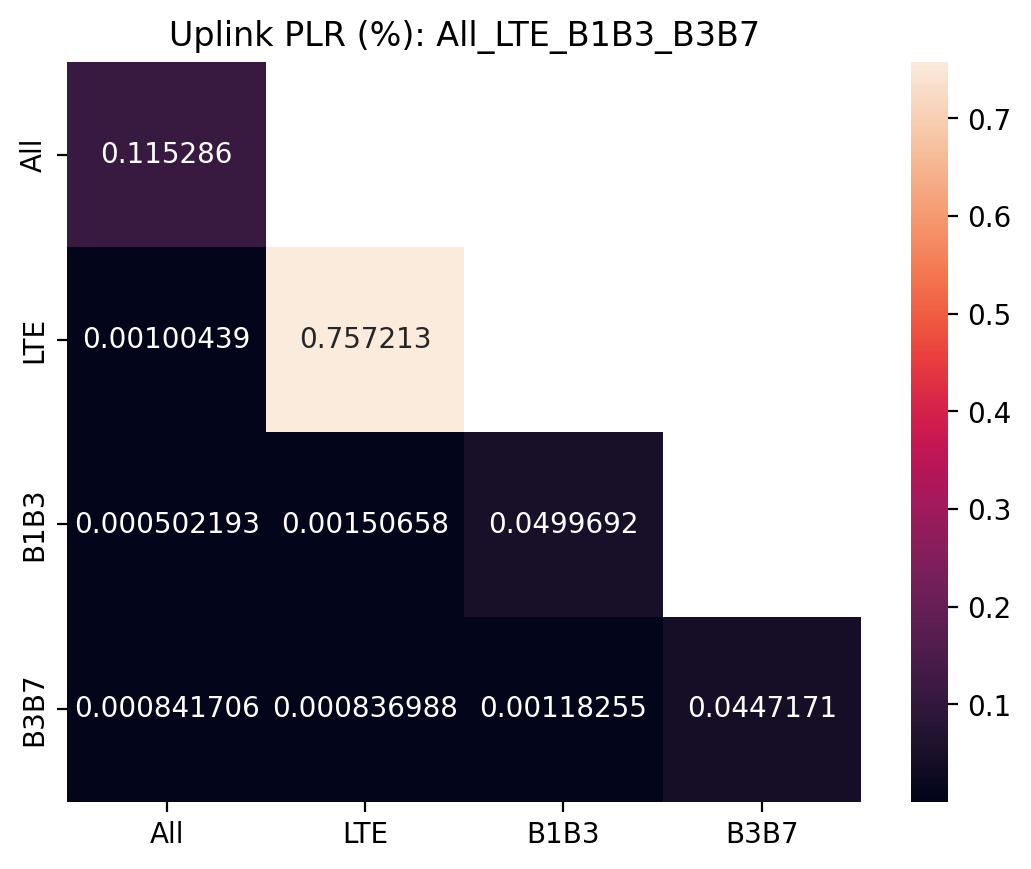

4


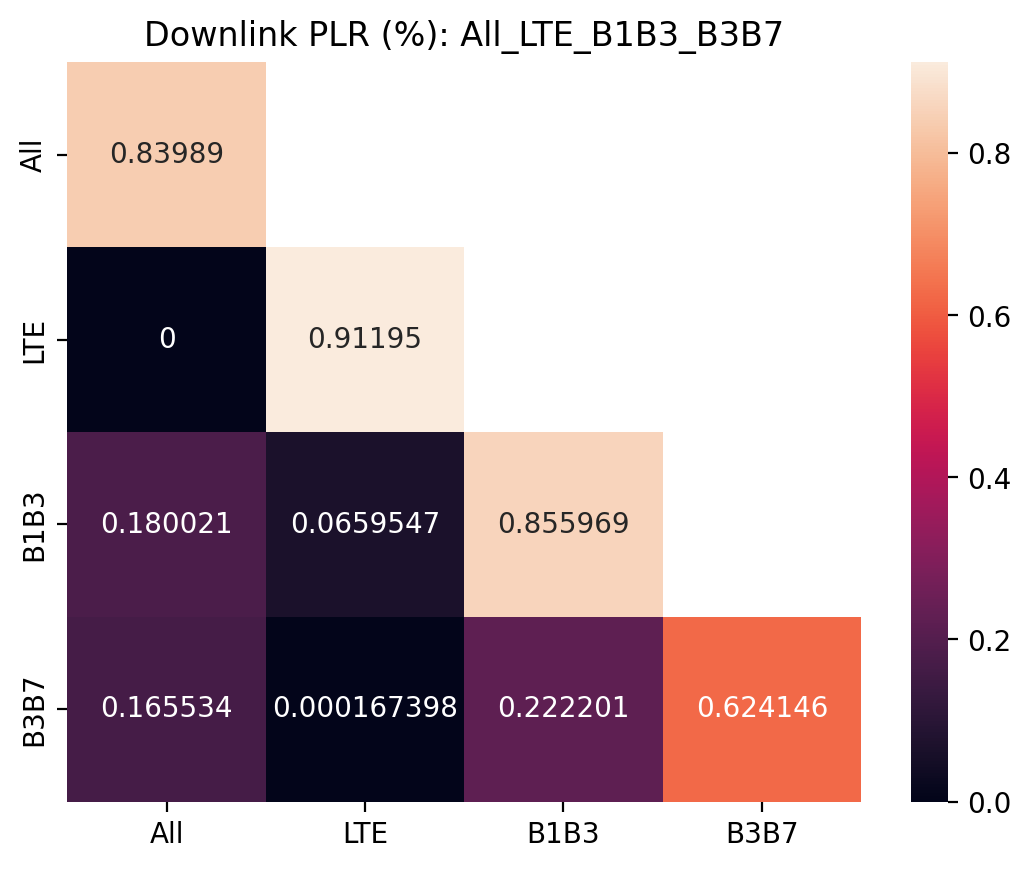

In [23]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Uplink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_ULPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Downlink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_DLPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

# All_LTE_B1B7_B7B8

In [24]:
datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
path = "/Users/jackbedford/Desktop/MOXA/2023-04-20/figure2"
exps = {
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    "2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
}
title = 'All_LTE_B1B7_B7B8'
_devices = [
    # ['qc00','qc01','qc02','qc03'],
    ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
]
_schemes = [
    # ['All','LTE','B1B3','B3B7'],
    ['All','LTE','B1B7','B7B8'],
    # ['All','LTE','B1B8','B3B8'],
    # ['All0','LTE1','All2','LTE3'],
    # ['All','LTE','B1','B3'],
    # ['All','LTE','B7','B8'],
]

i = -1
dfs_ul = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

i = -1
dfs_dl = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc00/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc01/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc02/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc03/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['All', 'LTE', 'B1B7', 'B7B8', 'All+LTE', 'All+B1B7', 'All+B7B8', 'LTE+B1B7', 'LTE+B7B8', 'B1B7+B7B8']


,0,1,2,3
0,All,All+LTE,All+B1B7,All+B7B8
1,0,LTE,LTE+B1B7,LTE+B7B8
2,0,0,B1B7,B1B7+B7B8
3,0,0,0,B7B8


4


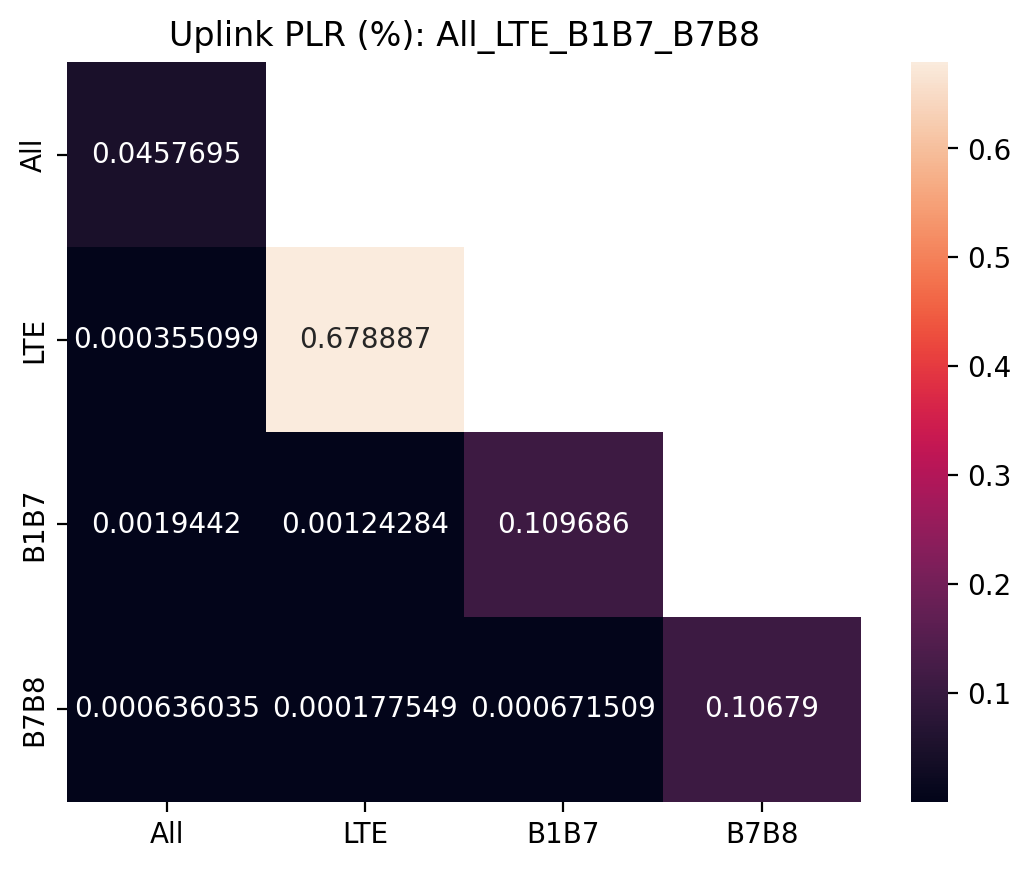

4


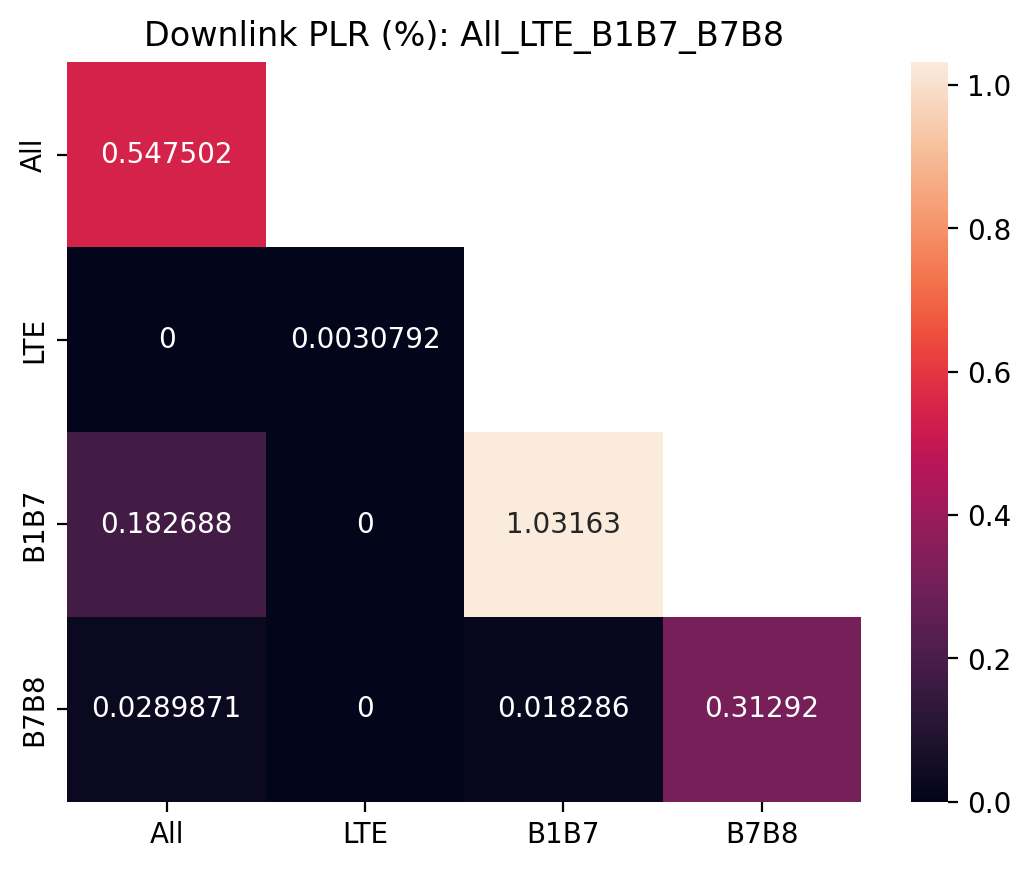

In [25]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Uplink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_ULPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Downlink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_DLPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

# All_LTE_B1B8_B3B8

In [26]:
datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
path = "/Users/jackbedford/Desktop/MOXA/2023-04-20/figure2"
exps = {
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    "2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
}
title = 'All_LTE_B1B8_B3B8'
_devices = [
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
]
_schemes = [
    # ['All','LTE','B1B3','B3B7'],
    # ['All','LTE','B1B7','B7B8'],
    ['All','LTE','B1B8','B3B8'],
    # ['All0','LTE1','All2','LTE3'],
    # ['All','LTE','B1','B3'],
    # ['All','LTE','B7','B8'],
]

i = -1
dfs_ul = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

i = -1
dfs_dl = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc00/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc01/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc02/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc03/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['All', 'LTE', 'B1B8', 'B3B8', 'All+LTE', 'All+B1B8', 'All+B3B8', 'LTE+B1B8', 'LTE+B3B8', 'B1B8+B3B8']


,0,1,2,3
0,All,All+LTE,All+B1B8,All+B3B8
1,0,LTE,LTE+B1B8,LTE+B3B8
2,0,0,B1B8,B1B8+B3B8
3,0,0,0,B3B8


4


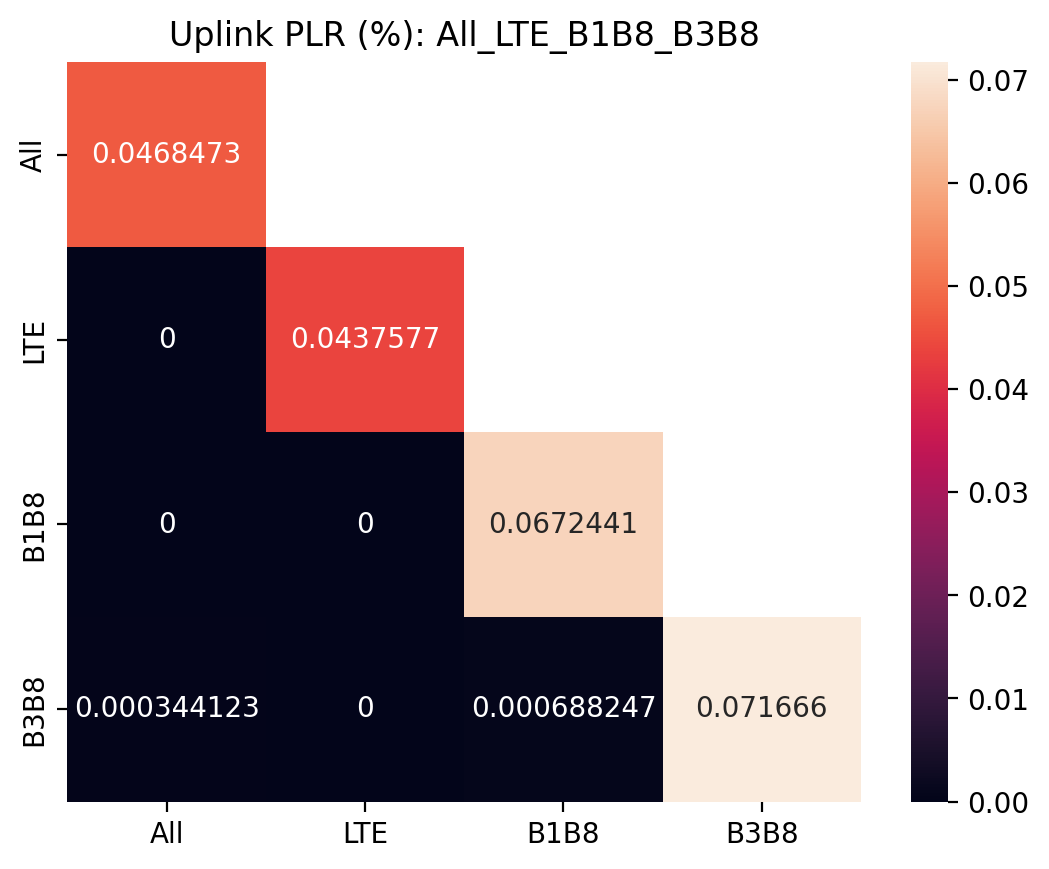

4


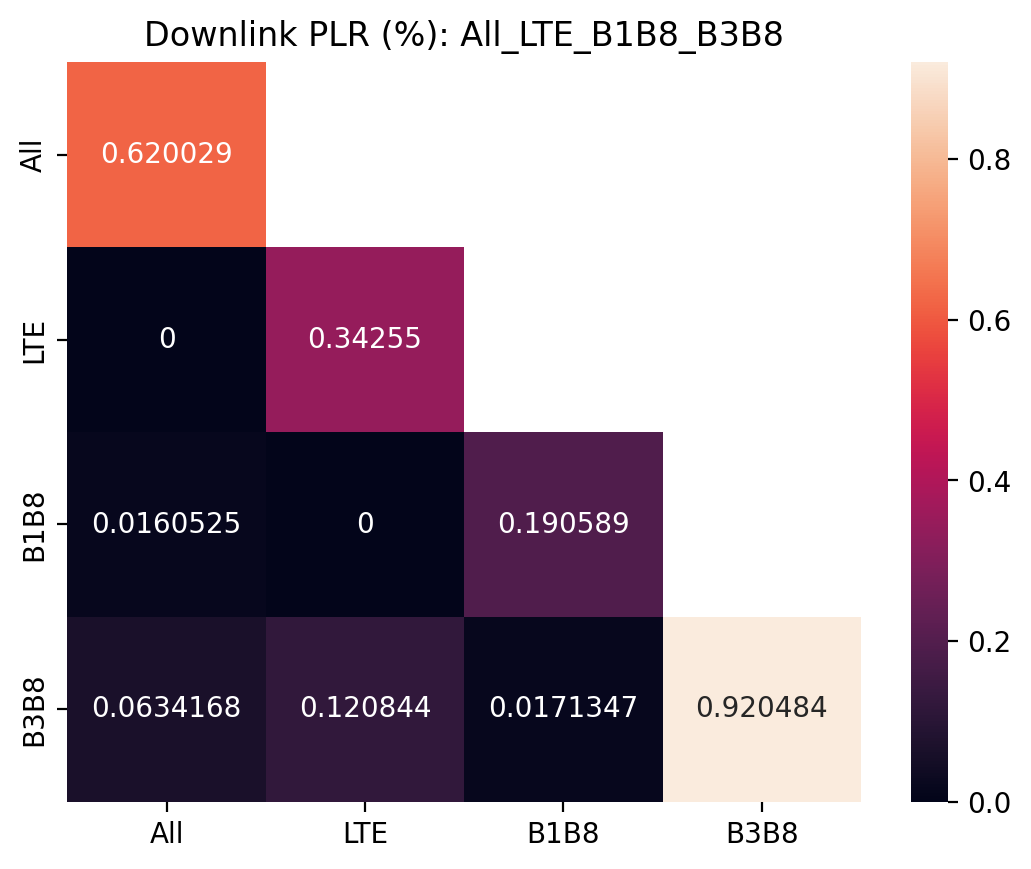

In [27]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Uplink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_ULPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Downlink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_DLPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

# All_LTE_All_LTE

In [28]:
datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
path = "/Users/jackbedford/Desktop/MOXA/2023-04-20/figure2"
exps = {
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    "2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
}
title = 'All_LTE_All_LTE'
_devices = [
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
]
_schemes = [
    # ['All','LTE','B1B3','B3B7'],
    # ['All','LTE','B1B7','B7B8'],
    # ['All','LTE','B1B8','B3B8'],
    ['All0','LTE1','All2','LTE3'],
    # ['All','LTE','B1','B3'],
    # ['All','LTE','B7','B8'],
]

i = -1
dfs_ul = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

i = -1
dfs_dl = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc00/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc01/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc02/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc03/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_B

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['All0', 'LTE1', 'All2', 'LTE3', 'All0+LTE1', 'All0+All2', 'All0+LTE3', 'LTE1+All2', 'LTE1+LTE3', 'All2+LTE3']


,0,1,2,3
0,All0,All0+LTE1,All0+All2,All0+LTE3
1,0,LTE1,LTE1+All2,LTE1+LTE3
2,0,0,All2,All2+LTE3
3,0,0,0,LTE3


4


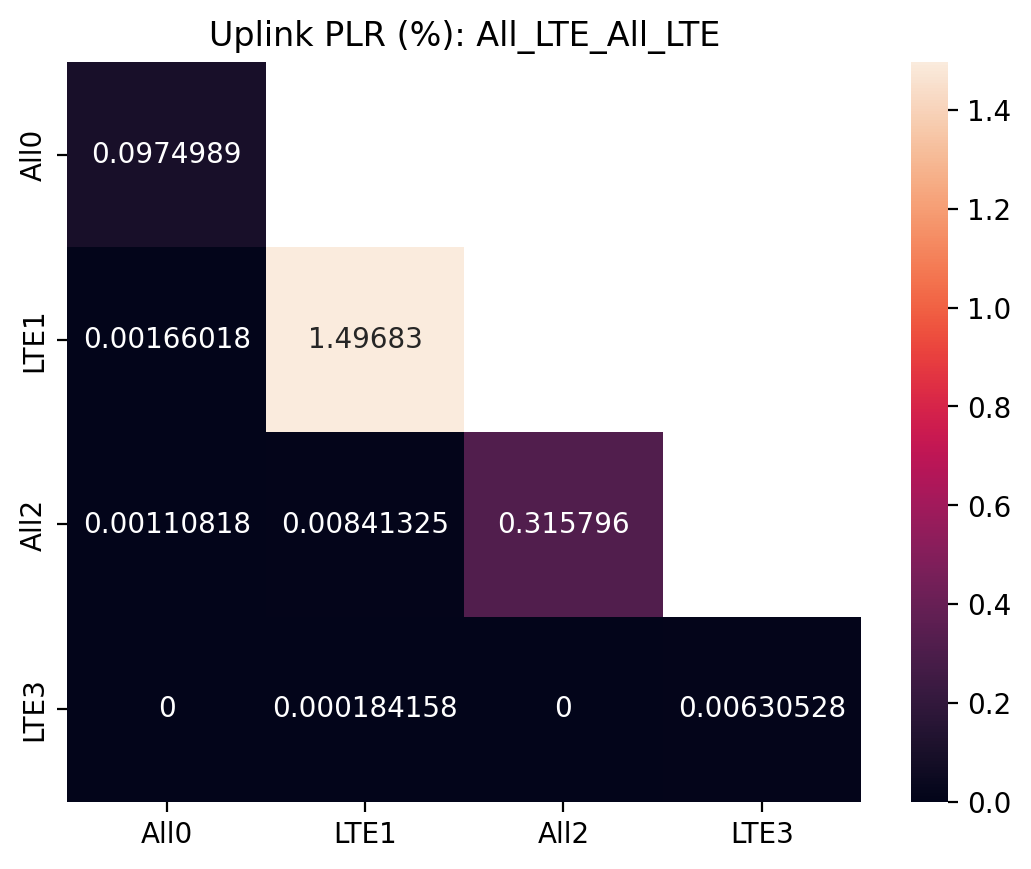

4


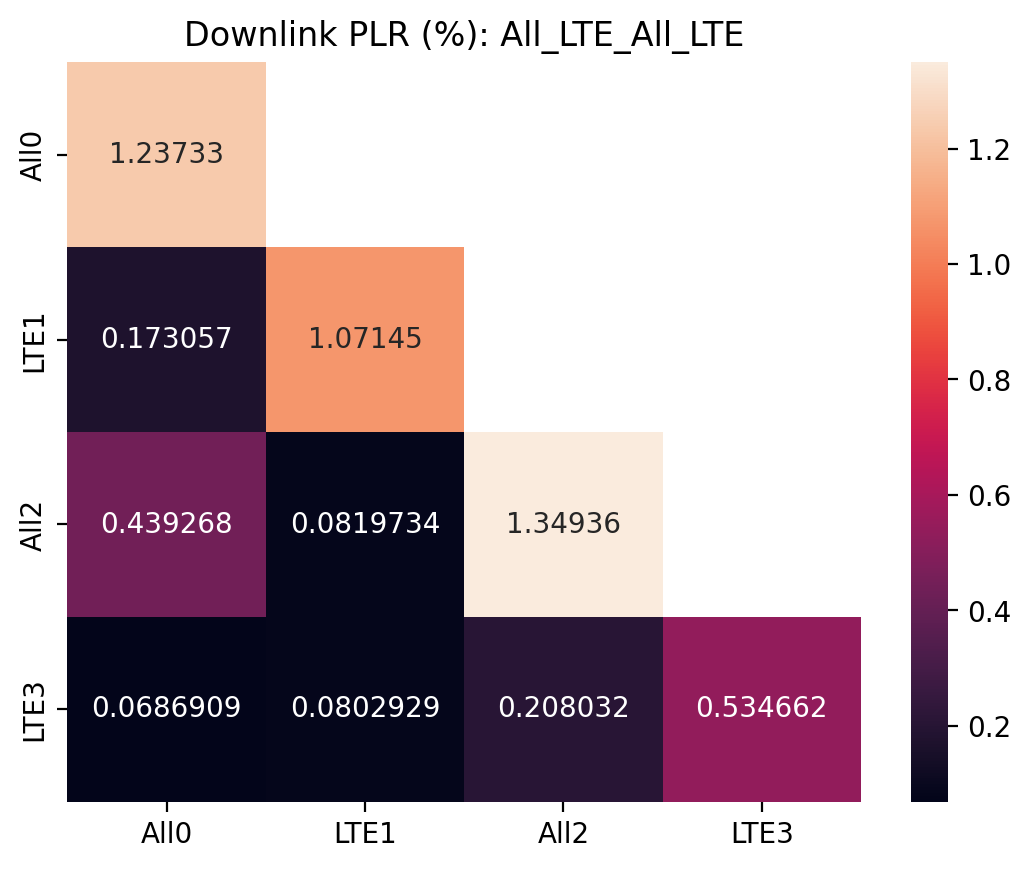

In [29]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Uplink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_ULPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Downlink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_DLPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

# All_LTE_B1_B3

In [30]:
datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
path = "/Users/jackbedford/Desktop/MOXA/2023-04-20/figure2"
exps = {
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    "2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
}
title = 'All_LTE_B1_B3'
_devices = [
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
]
_schemes = [
    # ['All','LTE','B1B3','B3B7'],
    # ['All','LTE','B1B7','B7B8'],
    # ['All','LTE','B1B8','B3B8'],
    # ['All0','LTE1','All2','LTE3'],
    ['All','LTE','B1','B3'],
    # ['All','LTE','B7','B8'],
]

i = -1
dfs_ul = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

i = -1
dfs_dl = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc00/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc01/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc02/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc03/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_Al

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['All', 'LTE', 'B1', 'B3', 'All+LTE', 'All+B1', 'All+B3', 'LTE+B1', 'LTE+B3', 'B1+B3']


,0,1,2,3
0,All,All+LTE,All+B1,All+B3
1,0,LTE,LTE+B1,LTE+B3
2,0,0,B1,B1+B3
3,0,0,0,B3


2


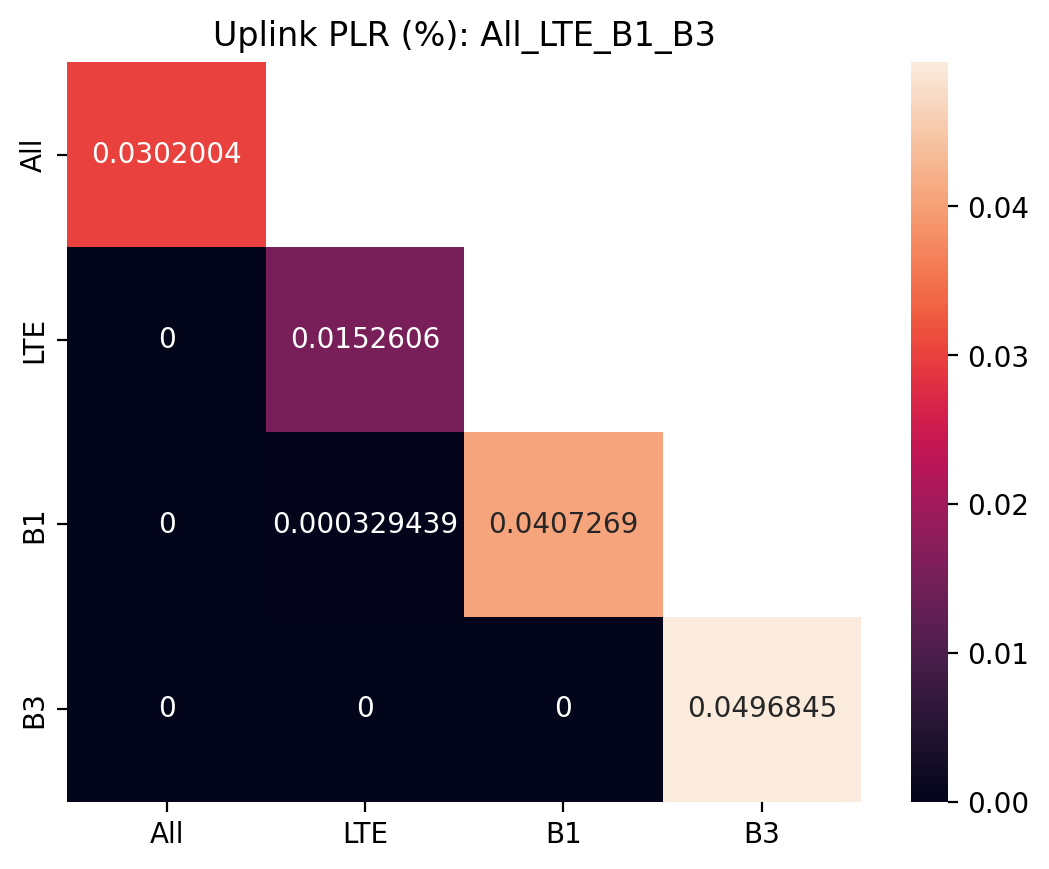

2


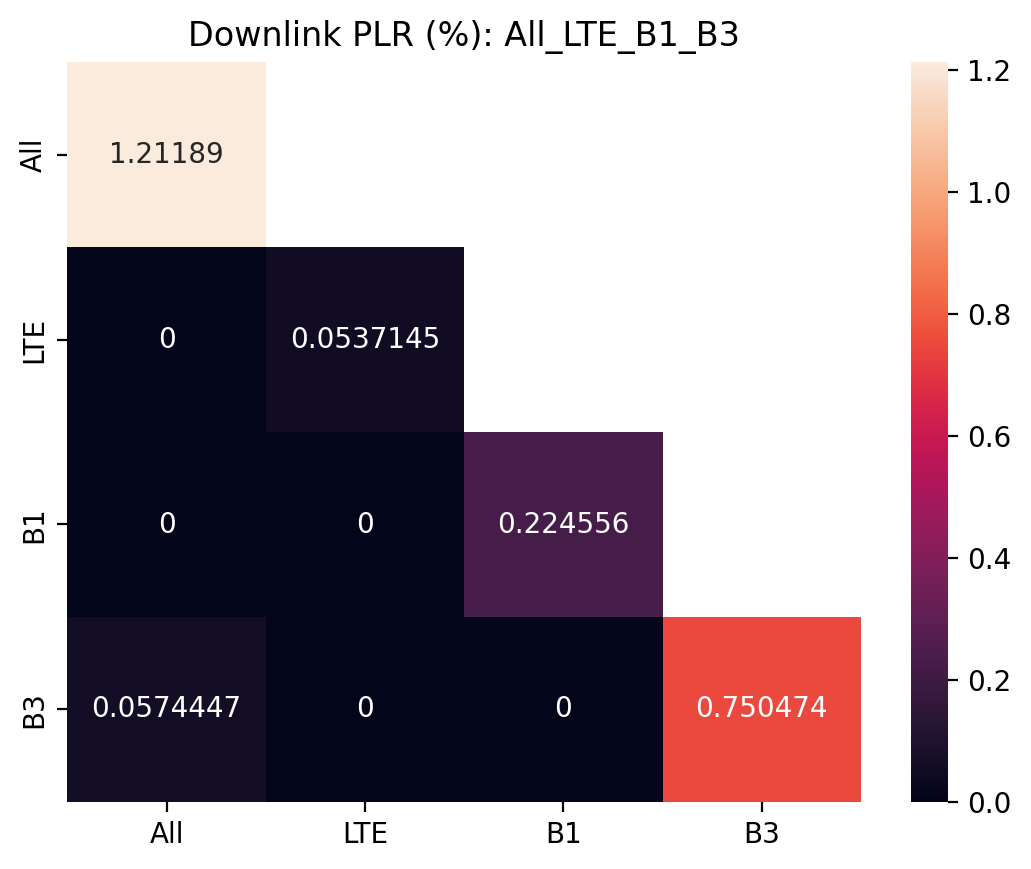

In [31]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Uplink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_ULPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Downlink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_DLPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

# All_LTE_B7_B8

In [32]:
datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
path = "/Users/jackbedford/Desktop/MOXA/2023-04-20/figure2"
exps = {
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B3_B3B7_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B7_B7B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1B8_B3B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_All_LTE_RM500Q": ['#{:02d}'.format(i+1) for i in range(4)],
    # "2023-04-17/_Bandlock_Udp_All_LTE_B1_B3_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
    "2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q": ['#{:02d}'.format(i+1) for i in range(2)],
}
title = 'All_LTE_B7_B8'
_devices = [
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    # ['qc00','qc01','qc02','qc03'],
    ['qc00','qc01','qc02','qc03'],
]
_schemes = [
    # ['All','LTE','B1B3','B3B7'],
    # ['All','LTE','B1B7','B7B8'],
    # ['All','LTE','B1B8','B3B8'],
    # ['All0','LTE1','All2','LTE3'],
    # ['All','LTE','B1','B3'],
    ['All','LTE','B7','B8'],
]

i = -1
dfs_ul = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

i = -1
dfs_dl = []
for (exp, traces), devices, schemes in zip(exps.items(), _devices, _schemes):
# for date, traces in dates.items():
    for trace in traces:
        i += 1
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            # data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            data = os.path.join(datadir, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc00/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc01/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc02/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc03/#01/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_All_LTE_B7_B8_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-04-17/_Bandlock_Udp_Al

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['All', 'LTE', 'B7', 'B8', 'All+LTE', 'All+B7', 'All+B8', 'LTE+B7', 'LTE+B8', 'B7+B8']


,0,1,2,3
0,All,All+LTE,All+B7,All+B8
1,0,LTE,LTE+B7,LTE+B8
2,0,0,B7,B7+B8
3,0,0,0,B8


2


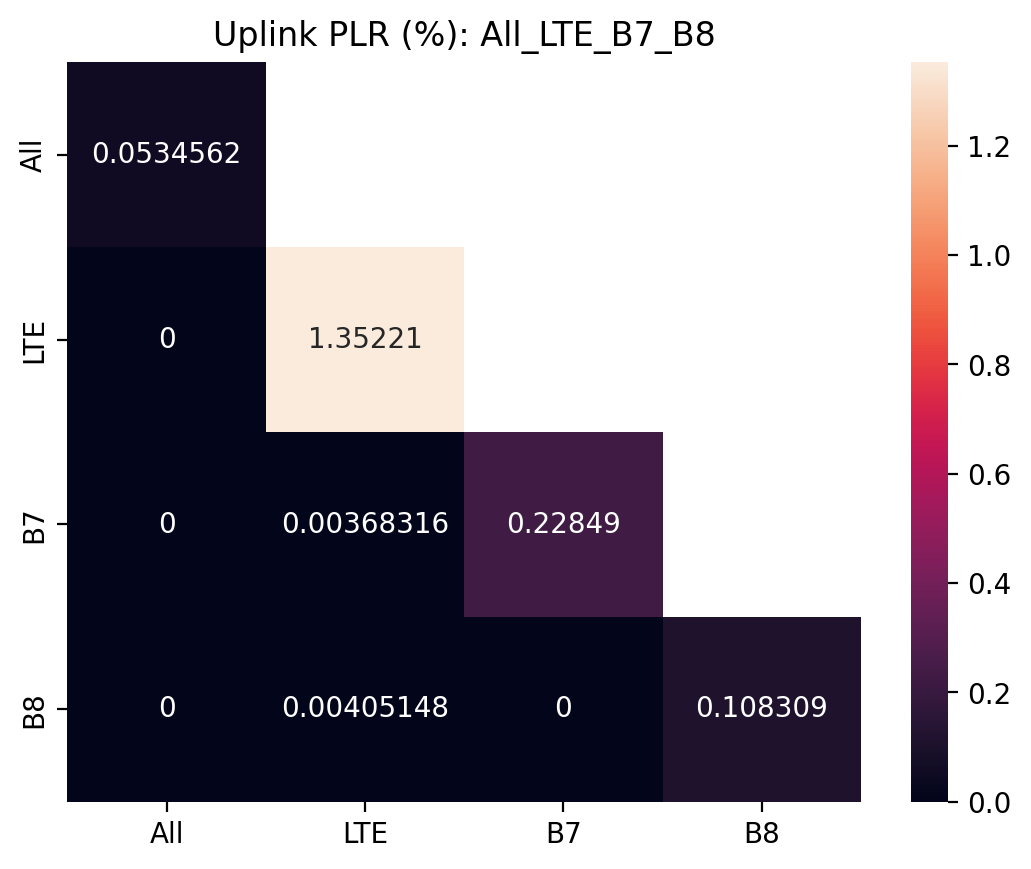

2


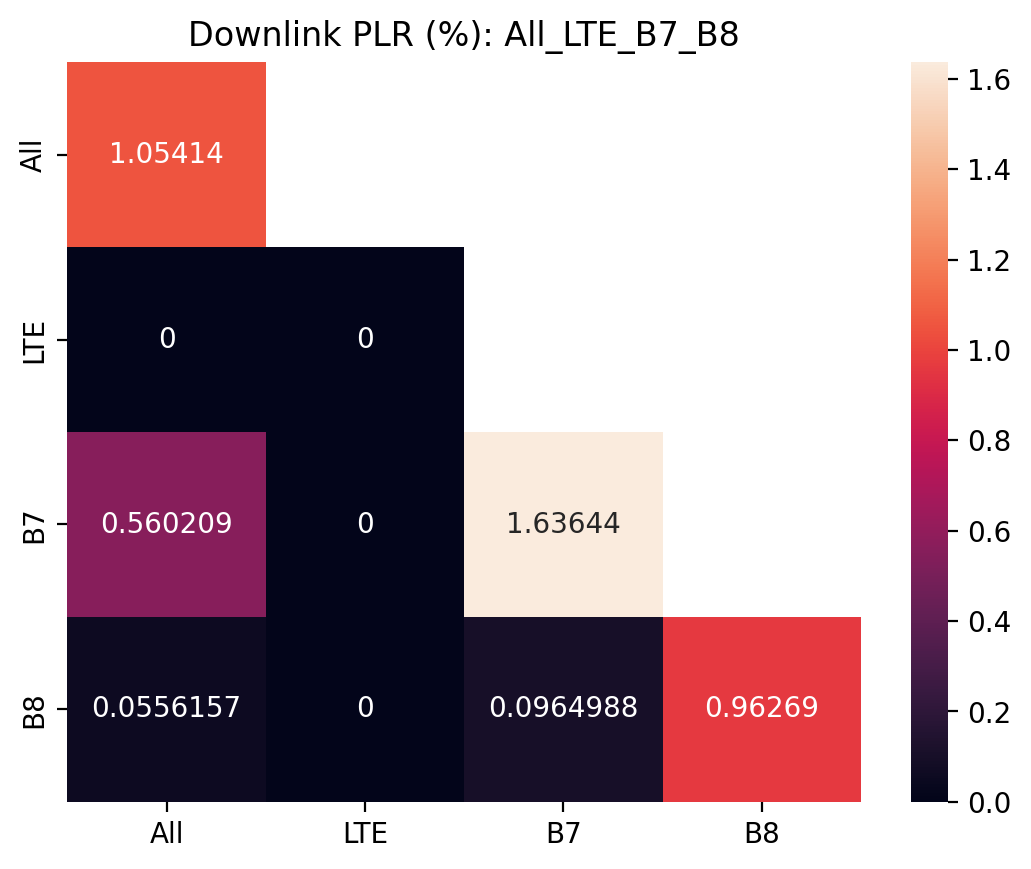

In [33]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Uplink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_ULPLR.png'), bbox_inches='tight', dpi=300)
plt.show()

N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title(f'Downlink PLR (%): {title}')
plt.savefig(os.path.join(path, f'{title}_DLPLR.png'), bbox_inches='tight', dpi=300)
plt.show()